# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import shutil
import os

# Reading Data

In [ ]:
train_data = pd.read_csv("Data/train.csv", index_col = False)

In [ ]:
print("Number of rows in data =", len(train_data))

Number of rows in data = 9437519


In [ ]:
train_data.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB


In [ ]:
np.sum(train_data.isna())

source_node         0
destination_node    0
dtype: int64

In [ ]:
np.sum(train_data.duplicated())

0

based on the previous output, we can see that we don't have neither null values, missing values nor duplicate rows.
Now we shall get small sample of our data and convert it into graph in order to be able to visualize this nodes and edges.

In [ ]:
sample_data = pd.read_csv("Data/train.csv", nrows = 30)
sample_data.to_csv("Data/sample_data.csv", sep = ',', index = False) 
sample_data.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [ ]:
# Reading subgraph from sample_data file using read_edgelist ====> conver it into Directed Graph
subgraph = nx.read_edgelist("Data/sample_data.csv", comments = 's', create_using = nx.DiGraph(), nodetype = int, delimiter = ",")

In [ ]:
nx.info(subgraph)

'DiGraph with 42 nodes and 30 edges'

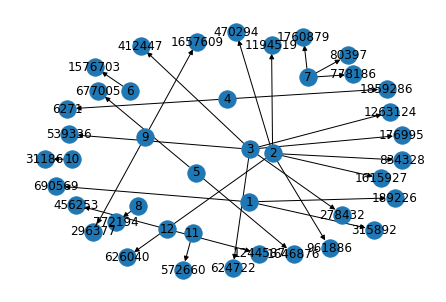

In [ ]:
nx.draw(subgraph, with_labels = True, node_size = 300)

This sample data was not taken randomly so we can see why for example 1, 2, 3, 4 has a lot of outcoming edges and not incoming edges as our original dataframe was sorted in ascending order on source node column.

In [ ]:
# Reading the whole data using networkx
train_graph = nx.read_edgelist("Data/train.csv", delimiter = ',', nodetype = int, comments = 's', create_using = nx.DiGraph())

In [ ]:
print("Number of unique person / nodes in our graph =" , len(train_graph.nodes))

Number of unique person / nodes in our graph = 1862220


# Followers of Each User

In [ ]:
indegree_dist = list(dict(train_graph.in_degree()).values())
indegree_dist.sort()

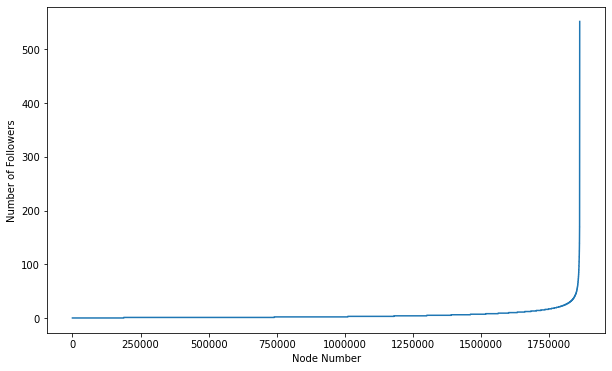

In [ ]:
plt.figure(figsize = (10, 6))
# Put integer values on x-axis rather than float
plt.ticklabel_format(style = "plain", axis = 'x', useOffset = False)
plt.plot(indegree_dist)
plt.xlabel("Node Number")
plt.ylabel("Number of Followers")
plt.show()

This plot tells us number of followers of each node out of total nodes sorted based on values not index so the index there is not sorted and it's not aggregated meaning that node mapped to value of it's own number of followers so mostly all of them have < 100 followers except very few have a little bit more than 500 followers (we can't know the index of it through the plot.)

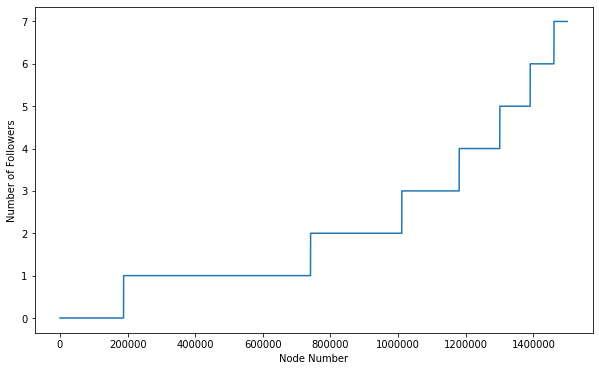

In [ ]:
# Focusing on the first 1,500,000 nodes and their number of followers
plt.figure(figsize = (10, 6))
plt.ticklabel_format(style = "plain", axis = 'x', useOffset = False)
plt.plot(indegree_dist[:1500000])
plt.xlabel("Node Number")
plt.ylabel("Number of Followers")
plt.show()

Obviously the change in number of followers is not large so we have a large number of nodes that have relatively small diffrence in term of number of followers so we can say that majority of nodes tend to group togeather in term of number of followers and only few number of them have a large followers number (Maybe famous people or influencers).

This plot focus on the first 1,500,000 index of our list it show actually the number of follower of our first 1,500,000 each one of them mapped to it's number of followers , the plot turn into stairs shape now and this shall prove that there is too small number of nodes which have big number of followers mode maybe than 250 they all located in the leftmost of out list.

In [ ]:
print("Min number of followers for a node =", np.min(indegree_dist))
print("Max number of followers for a node =", np.max(indegree_dist))

Min number of followers for a node = 0
Max number of followers for a node = 552


In [ ]:
cnt = 0
for i in indegree_dist:
  if i == 0:
    cnt += 1

print("Number of nodes with no followers ==> Zero followers =", cnt)

Number of nodes with no followers ==> Zero followers = 188043


In [ ]:
cnt = 0
mx = np.max(indegree_dist)
for i in indegree_dist:
  if i == mx:
    cnt += 1

print("Number of nodes with max followers ==> Max number of followers =", cnt)

Number of nodes with max followers ==> Max number of followers = 1


So we have a lot of nodes (Users) about 188K with no fllowers at all but we have only one user with max number of followers which is 552, Now we shall calculate Mean, Median and Percentaile of indegree distribuiton to get more insight of how this values spread.

In [ ]:
print("The average of indegree of users =", np.mean(indegree_dist))
print("The median of indegree of users =", np.median(indegree_dist))

The average of indegree of users = 5.067886178861789
The median of indegree of users = 2.0


With thoses value we can obviously say that mean is skewed to right due to some nodes with large number of followers but median was not affected by those extreme values, We can see the slow change in values closeley better using percentiles values.

In [ ]:
for i in range(10, 100, 10):
  print(f"The {i}th percentile =", np.percentile(indegree_dist, i))

The 10th percentile = 0.0
The 20th percentile = 1.0
The 30th percentile = 1.0
The 40th percentile = 2.0
The 50th percentile = 2.0
The 60th percentile = 3.0
The 70th percentile = 5.0
The 80th percentile = 7.0
The 90th percentile = 12.0


Most of the values tend to have small to resonable number of followers which is normal and that is obvious to from the previous numbers as it stated that the diffrebce betweeb 90th percentile and 20th percentile is only 11 follower yet the gap is large, For that if we focus on the right part of the followers starting from 90th and larger to get more insight how the number of followers of those values growth.

In [ ]:
for i in range(90, 101, 1):
  print(f"The {i}th percentile =", np.percentile(indegree_dist, i))

The 90th percentile = 12.0
The 91th percentile = 13.0
The 92th percentile = 14.0
The 93th percentile = 15.0
The 94th percentile = 17.0
The 95th percentile = 19.0
The 96th percentile = 21.0
The 97th percentile = 24.0
The 98th percentile = 29.0
The 99th percentile = 40.0
The 100th percentile = 552.0


In [ ]:
for i in range(0, 110, 10):
  j = 99 + (i / 100)
  print(f"The {j}th percentile =", np.percentile(indegree_dist, j))

The 99.0th percentile = 40.0
The 99.1th percentile = 42.0
The 99.2th percentile = 44.0
The 99.3th percentile = 47.0
The 99.4th percentile = 50.0
The 99.5th percentile = 55.0
The 99.6th percentile = 61.0
The 99.7th percentile = 70.0
The 99.8th percentile = 84.0
The 99.9th percentile = 112.0
The 100.0th percentile = 552.0


The growth in the number of followers at the last 10th percentile happened faster than lower part of the range, those values have to be celebrites whos have a lot of followers, one can consider each one of this extrem values as outlier / not outlier, we could measure this using Whishkers Box-Plot or using IQR rule as follow.

In [ ]:
Q1, Q3 = np.percentile(indegree_dist, 25), np.percentile(indegree_dist, 75)
IQR = Q3 - Q1
print("Inter Quantile Range =", IQR)

In [ ]:
low_limit, high_limit = -1.5 * Q1, +1.5 * Q3
print("The low limit of the data to be consider as outliers =", low_limit)
print("The high limit of the data to be consider as outliers =", high_limit)

The low limit of the data to be consider as outliers = -1.5
The high limit of the data to be consider as outliers = 9.0


So each value below our low limit would be considered as outlier but here this is not possible due to the fact that the low limit is negative hence no user has negative number of followers and that's obvious because the data is clearley skewed to the right, and each value grater than our high limit in this case 9 would be considered as outliers.

In [ ]:
cnt = 0
for i in indegree_dist:
  if i > high_limit:
    cnt += 1

print("Number of values over the upper limit =", cnt)
print("Percentage of values over the upper limit =", (cnt / 1862220) * 100, '%')

Number of values over the upper limit = 261240
Percentage of values over the upper limit = 14.028417695009182 %


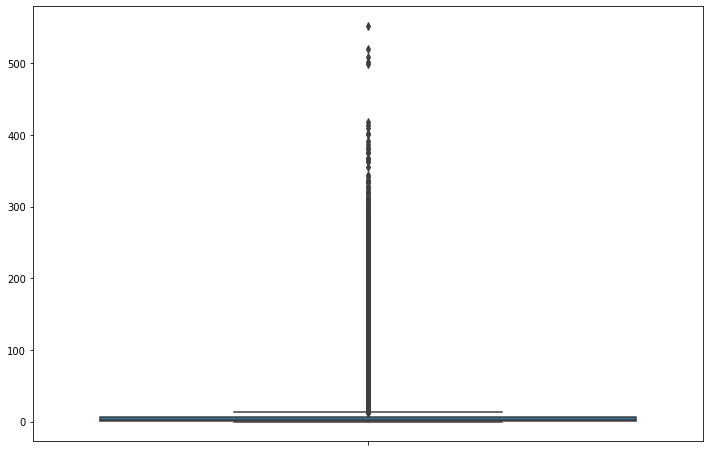

In [ ]:
plt.figure(figsize = (12, 8))
sns.boxplot(y = indegree_dist)
plt.show()

But this might be extream to consider about 14% of data as outliers just because some of them have more than 9 followers, this would not be resonable, for that i will try to change the threshold for 1.5 to 3 repeat the previous steps once again.

In [ ]:
# I will discard low limit as it will be negative anyway
high_limit = +3 * Q3
print("The high limit of the data to be consider as outliers =", high_limit)

The high limit of the data to be consider as outliers = 18.0


In [ ]:
cnt = 0
for i in indegree_dist:
  if i > high_limit:
    cnt += 1

print("Number of values over the upper limit =", cnt)
print("Percentage of values over the upper limit =", (cnt / 1862220) * 100, '%')

Number of values over the upper limit = 93679
Percentage of values over the upper limit = 5.030501229715071 %


This is more resonable and acceptable results as only 5% of the data could be outliers (not neccessary) rather than having 14% as outliers which is really large percentage.

<Figure size 1080x864 with 0 Axes>

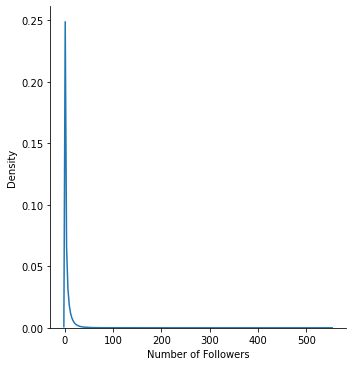

In [ ]:
plt.figure(figsize = (15, 12))
sns.displot(data = indegree_dist, kind = "kde")
plt.xlabel("Number of Followers")
plt.show()

This distribuiton look like some kind of Power Law distribution or log normal distribution where majority of values centered in the left side of the plot and only few number of values tend to have a large response, those values may be outliers.